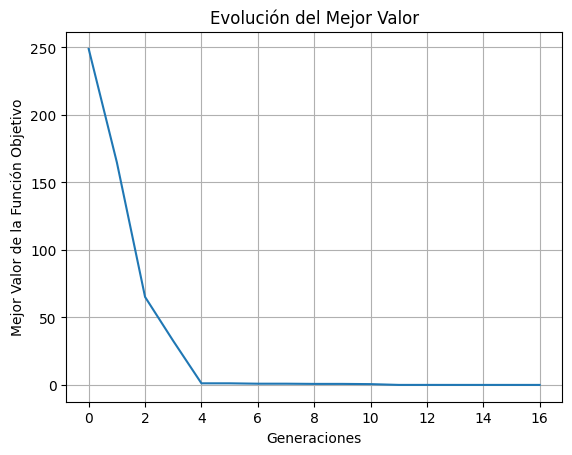

[1.00845849 1.01186199]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pob_inicial(N, d, LB, UB):
    Pob0 = np.random.rand(N, d)
    return Pob0 * (UB - LB) + LB

def mutacion(Pob, indices_mutantes, LB, UB):
    Pob = Pob.copy()
    for i in indices_mutantes:
        coord_mutacion = np.random.randint(low=0, high=Pob.shape[1], size=1)
        Pob[i, coord_mutacion[0]] = np.random.rand() * (UB[coord_mutacion[0]] - LB[coord_mutacion[0]]) + LB[coord_mutacion[0]]
    return Pob

def cruzamiento(Pob):
    Pob = Pob.copy()
    n_mitad = Pob.shape[0] // 2
    Pob_hijos = np.zeros_like(Pob)
    for i in range(n_mitad):
        coord_cruce = np.random.randint(low=0, high=Pob.shape[1])
        Pob_hijos[i, :] = np.concatenate((Pob[i, :coord_cruce], Pob[n_mitad + i, coord_cruce:]))
        Pob_hijos[n_mitad + i, :] = np.concatenate((Pob[n_mitad + i, :coord_cruce], Pob[i, coord_cruce:]))
    return Pob_hijos

def next_gen(Pob, LB, UB, fr_elitismo, fr_mutacion):
    n_row = Pob.shape[0]
    n_mutacion = int(n_row * fr_mutacion)
    n_cruzamiento = 2 * (n_row - int(n_row * fr_elitismo) - n_mutacion) // 2
    n_elite = n_row - n_cruzamiento - n_mutacion

    Pob_elite = Pob[:n_elite, :]
    indices_de_los_novios = np.random.choice(n_row, size=n_cruzamiento, replace=False)
    Pob_hijos = cruzamiento(Pob[indices_de_los_novios, :])
    indices_mutantes = np.random.choice(n_row, size=n_mutacion, replace=False)
    Pob_mutantes = mutacion(Pob, indices_mutantes, LB, UB)
    return np.vstack((Pob_elite, Pob_hijos, Pob_mutantes))

def fitness(Pob, f_obj):
    f_val = np.array([f_obj(individuo) for individuo in Pob])
    ranking = np.argsort(f_val)
    return Pob[ranking, :], f_val.min()

def mi_algoritmo_evolutivo(f_obj, N, d, fr_elitismo, fr_mutacion, num_generaciones, LB, UB):
    Pob0 = pob_inicial(N, d, LB, UB)
    x_best = []
    f_best = []
    for _ in range(num_generaciones):
        Pob_ranked, f_best_i = fitness(Pob0, f_obj)
        x_best.append(Pob_ranked[0, :])
        f_best.append(f_best_i)
        Pob0 = next_gen(Pob_ranked, LB, UB, fr_elitismo, fr_mutacion)
    return x_best, f_best

def rosenbrock_fun(x):
    return sum(100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x) - 1))

np.random.seed(1234)
d = 2
num_generaciones = 17
LB = -10 * np.ones(d)
UB = 10 * np.ones(d)
mejor_sol, mejor_valor = mi_algoritmo_evolutivo(
    rosenbrock_fun, N=30, d=2, fr_elitismo=0.05, fr_mutacion=0.1, num_generaciones=num_generaciones, LB=LB, UB=UB
)

plt.plot(np.arange(0, num_generaciones), mejor_valor)
plt.xlabel('Generaciones')
plt.ylabel('Mejor Valor de la Función Objetivo')
plt.title('Evolución del Mejor Valor')
plt.grid()
plt.show()
print(mejor_sol[-1])

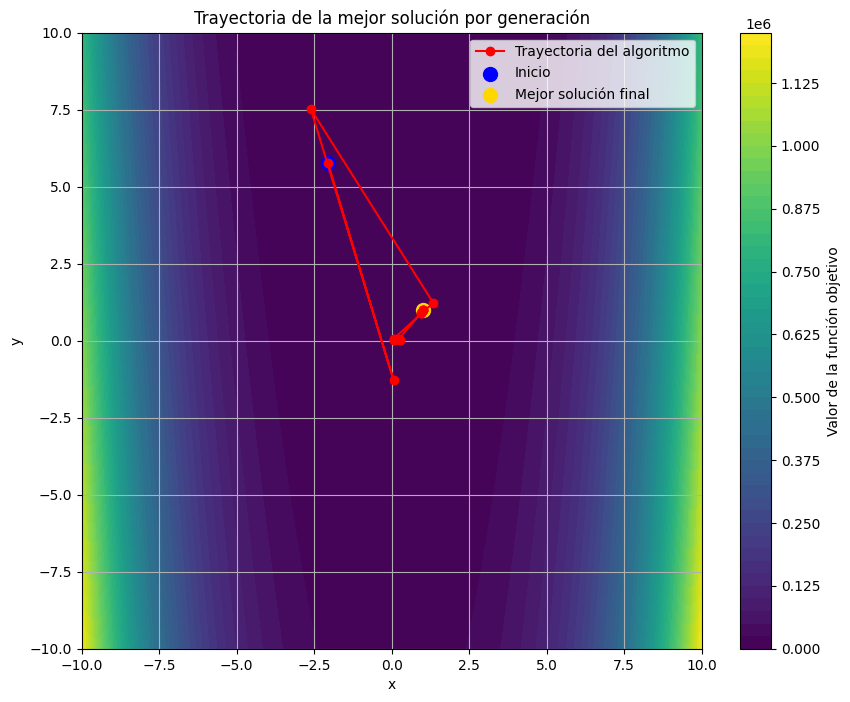

mejor solucion final:  [1.00845849 1.01186199]


In [74]:
# Graficar la trayectoria de la mejor solución en cada generación
def graficar_trayectoria(mejores_soluciones, funcion_objetivo, LB, UB):
    """
    Grafica la trayectoria de las mejores soluciones a través de las generaciones.

    Parámetros:
    - mejores_soluciones: lista de las mejores soluciones de cada generación.
    - funcion_objetivo: función objetivo utilizada en el algoritmo.
    - LB: límites inferiores del espacio de búsqueda.
    - UB: límites superiores del espacio de búsqueda.
    """
    # Crear una malla para la superficie de la función objetivo
    x = np.linspace(LB[0], UB[0], 500)
    y = np.linspace(LB[1], UB[1], 500)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[funcion_objetivo([xi, yi]) for xi, yi in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

    # Convertir las mejores soluciones a un array para graficar
    mejores_soluciones = np.array(mejores_soluciones)
    x_mejor = mejores_soluciones[:, 0]
    y_mejor = mejores_soluciones[:, 1]

    # Graficar
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, Z, levels=50, cmap="viridis")
    plt.colorbar(label="Valor de la función objetivo")
    plt.plot(x_mejor, y_mejor, marker="o", color="red", label="Trayectoria del algoritmo")
    plt.scatter(x_mejor[0], y_mejor[0], color="blue", label="Inicio", s=100)
    plt.scatter(x_mejor[-1], y_mejor[-1], color="gold", label="Mejor solución final", s=100)
    plt.title("Trayectoria de la mejor solución por generación")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función con las mejores soluciones
graficar_trayectoria(mejor_sol, rosenbrock_fun, LB, UB)

print("mejor solucion final: ",mejor_sol[-1])